In [26]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [27]:
df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df = df.rename(index=str, columns={"default payment next month": "Y"})

df = df.drop('ID',  axis=0)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Y            30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [29]:
# convert variables from objects into float
df = df.astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
Y            30000 non-null float32
dtypes: float32(24)
memory usage

In [30]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object', name='ID')

In [31]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,OUTSTANDING_BAL1,OUTSTANDING_BAL2,OUTSTANDING_BAL3,OUTSTANDING_BAL4,OUTSTANDING_BAL5,OUTSTANDING_BAL6
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,1.0,3913.0,2413.0,689.0,0.0,0.0,0.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1000.0,0.0,2000.0,1.0,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,5000.0,0.0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1100.0,1069.0,1000.0,0.0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,9000.0,689.0,679.0,0.0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


In [32]:
# created new column %_LIMIT_BAL for each month

df["%_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["%_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["%_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["%_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["%_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["%_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)


df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,OUTSTANDING_BAL3,OUTSTANDING_BAL4,OUTSTANDING_BAL5,OUTSTANDING_BAL6,%_LIMIT_BAL1,%_LIMIT_BAL2,%_LIMIT_BAL3,%_LIMIT_BAL4,%_LIMIT_BAL5,%_LIMIT_BAL6
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1682.0,2272.0,3455.0,1261.0,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,12559.0,13331.0,13948.0,10549.0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,48091.0,27214.0,27890.0,28547.0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,25835.0,11940.0,18457.0,18452.0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 36 columns):
LIMIT_BAL           30000 non-null float32
SEX                 30000 non-null float32
EDUCATION           30000 non-null float32
MARRIAGE            30000 non-null float32
AGE                 30000 non-null float32
PAY_0               30000 non-null float32
PAY_2               30000 non-null float32
PAY_3               30000 non-null float32
PAY_4               30000 non-null float32
PAY_5               30000 non-null float32
PAY_6               30000 non-null float32
BILL_AMT1           30000 non-null float32
BILL_AMT2           30000 non-null float32
BILL_AMT3           30000 non-null float32
BILL_AMT4           30000 non-null float32
BILL_AMT5           30000 non-null float32
BILL_AMT6           30000 non-null float32
PAY_AMT1            30000 non-null float32
PAY_AMT2            30000 non-null float32
PAY_AMT3            30000 non-null float32
PAY_AMT4            30000 non-null f

In [34]:
## Bin the AVG_PAY_AMT column and replace with Logical variables

labels = ["<_2,500", "<=_7,500", ">_15,000"]
bins = [0, 2500, 7500, 15000]
df['bin_BILL_AMT1'] = pd.cut(df['BILL_AMT1'], bins, labels = labels)
print(df['bin_BILL_AMT1'].value_counts())
df = df.join(pd.get_dummies(df['bin_BILL_AMT1'], prefix = 'BILL_AMT1'))

<_2,500     4069
<=_7,500    3071
>_15,000    2749
Name: bin_BILL_AMT1, dtype: int64


In [35]:
# Create AVG_PAY_AMT

df['AVG_PAY_AMT'] = ((df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6)/6)


print(df['AVG_PAY_AMT'])

1          114.833336
2          833.333313
3         1836.333374
4         1398.000000
5         9841.500000
6         1295.333374
7        30126.500000
8          798.500000
9         1126.833374
10        2354.833252
11        1078.666626
12       11051.333008
13        3895.000000
14        1783.333374
15        3000.000000
16        1033.333374
17        1058.333374
18       60316.167969
19           0.000000
20           0.000000
21        7038.500000
22         263.333344
23        1835.000000
24        3764.833252
25        2733.333252
26        1315.166626
27         416.666656
28        1185.333374
29        6594.500000
30        1100.000000
             ...     
29971    27018.333984
29972     2780.166748
29973    32399.000000
29974        0.000000
29975      833.333313
29976     5335.333496
29977     1586.666626
29978     5933.333496
29979     9237.333008
29980        0.000000
29981     4750.000000
29982      934.166687
29983     1366.666626
29984     3548.000000
29985     

In [36]:
## Bin the AVG_PAY_AMT column and replace with Logical variables

labels = ["<_2,500", "<=_7,500", ">_15,000"]
bins = [0, 2500, 7500, 15000]
df['bin_AVG_PAY_AMT'] = pd.cut(df['AVG_PAY_AMT'], bins, labels = labels)
print(df['bin_AVG_PAY_AMT'].value_counts())
df = df.join(pd.get_dummies(df['bin_AVG_PAY_AMT'], prefix = 'AVG_PAY_AMT'))

<_2,500     14006
<=_7,500     9213
>_15,000     3123
Name: bin_AVG_PAY_AMT, dtype: int64


In [37]:
## Bin the LIMIT BAL column and replace with Logical variables

labels = ["<_80,000", "<=_200,0000", ">_200,000"]
bins = [0, 80000, 200000, 30000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins, labels = labels)
print(df['binned'].value_counts())
df = df.join(pd.get_dummies(df['binned'], prefix = 'Limit Bal'))

<_80,000       10799
>_200,000       9622
<=_200,0000     9579
Name: binned, dtype: int64


2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64


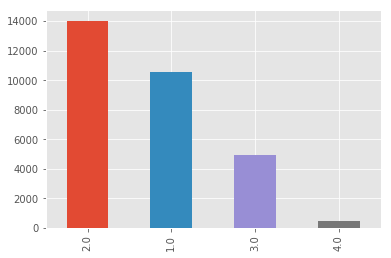

In [38]:
# Education values with scores of 5.0, 6.0 and 0.0 were replaces to the other category of 4.0
# Net result: 1 = Graduate School, 2 = University, 3 = High School, 4 = other

df.EDUCATION = df.EDUCATION.replace([5.0,6.0,0.0],4.0)
df.EDUCATION.value_counts().plot(kind = "bar")
print(df.EDUCATION.value_counts())

2.0    15964
1.0    13659
3.0      377
Name: MARRIAGE, dtype: int64


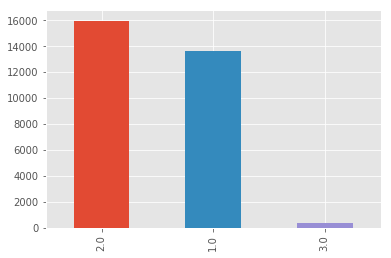

In [39]:
# Replace MARRIAGE values of 0 with 3

df.MARRIAGE = df.MARRIAGE.replace([0.0],3.0)
df.MARRIAGE.value_counts().plot(kind = "bar")
print(df.MARRIAGE.value_counts())

In [40]:
# Split dataset into training set and test set
# 70% training and 30% test

df_train, df_test = train_test_split(df, test_size=0.3, random_state=2019) 


In [41]:
print("***** df_train *****")
print(df_train.head())
print("\n")
print("***** df_test *****")
print(df_test.head())

***** df_train *****
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
20748   360000.0  1.0        2.0       1.0  36.0   -2.0   -2.0   -2.0   -2.0   
22071   100000.0  2.0        2.0       2.0  23.0    0.0    0.0    0.0    0.0   
3439    200000.0  2.0        1.0       1.0  34.0   -1.0   -1.0   -1.0   -1.0   
21757   270000.0  2.0        2.0       1.0  25.0    0.0    0.0    0.0    0.0   
7796    500000.0  2.0        1.0       1.0  38.0    0.0    0.0    0.0    2.0   

       PAY_5         ...           BILL_AMT1_>_15,000   AVG_PAY_AMT  \
20748   -2.0         ...                            0   2070.000000   
22071    0.0         ...                            1   5091.333496   
3439     0.0         ...                            0  10759.166992   
21757    0.0         ...                            0   5257.666504   
7796    -1.0         ...                            0  11717.333008   

       bin_AVG_PAY_AMT  AVG_PAY_AMT_<_2,500  AVG_PAY_AMT_<=_7,500  \
20

In [42]:
# For the train set
df_train.isna().head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"BILL_AMT1_>_15,000",AVG_PAY_AMT,bin_AVG_PAY_AMT,"AVG_PAY_AMT_<_2,500","AVG_PAY_AMT_<=_7,500","AVG_PAY_AMT_>_15,000",binned,"Limit Bal_<_80,000","Limit Bal_<=_200,0000","Limit Bal_>_200,000"
20748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22071,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# For the test set
df_test.isna().head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"BILL_AMT1_>_15,000",AVG_PAY_AMT,bin_AVG_PAY_AMT,"AVG_PAY_AMT_<_2,500","AVG_PAY_AMT_<=_7,500","AVG_PAY_AMT_>_15,000",binned,"Limit Bal_<_80,000","Limit Bal_<=_200,0000","Limit Bal_>_200,000"
9707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23848,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
print("*****In the df_train set*****")
print(df_train.isna().sum())
print("\n")
print("*****In the df_test set*****")
print(df_test.isna().sum())

*****In the df_train set*****
LIMIT_BAL                    0
SEX                          0
EDUCATION                    0
MARRIAGE                     0
AGE                          0
PAY_0                        0
PAY_2                        0
PAY_3                        0
PAY_4                        0
PAY_5                        0
PAY_6                        0
BILL_AMT1                    0
BILL_AMT2                    0
BILL_AMT3                    0
BILL_AMT4                    0
BILL_AMT5                    0
BILL_AMT6                    0
PAY_AMT1                     0
PAY_AMT2                     0
PAY_AMT3                     0
PAY_AMT4                     0
PAY_AMT5                     0
PAY_AMT6                     0
Y                            0
OUTSTANDING_BAL1             0
OUTSTANDING_BAL2             0
OUTSTANDING_BAL3             0
OUTSTANDING_BAL4             0
OUTSTANDING_BAL5             0
OUTSTANDING_BAL6             0
%_LIMIT_BAL1                 0
%_LIMIT_B

In [20]:
print("***** df_Train_Set *****")
print(df_train.describe())
print("\n")
print("***** df_Test_Set *****")
print(df_test.describe())

***** df_Train_Set *****
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    166933.796875      1.605952      1.847333      1.553619     35.518429   
std     129517.500000      0.488657      0.745562      0.521714      9.262934   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.014857     -0.130810     -0.163190     -0.217857     -0.266810   
std     

In [21]:
print(df_train.columns.values)

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6' 'Y' 'OUTSTANDING_BAL1' 'OUTSTANDING_BAL2'
 'OUTSTANDING_BAL3' 'OUTSTANDING_BAL4' 'OUTSTANDING_BAL5'
 'OUTSTANDING_BAL6' '%_LIMIT_BAL1' '%_LIMIT_BAL2' '%_LIMIT_BAL3'
 '%_LIMIT_BAL4' '%_LIMIT_BAL5' '%_LIMIT_BAL6' 'bin_BILL_AMT1'
 'BILL_AMT1_<_2,500' 'BILL_AMT1_<=_7,500' 'BILL_AMT1_>_15,000'
 'AVG_PAY_AMT' 'bin_AVG_PAY_AMT' 'AVG_PAY_AMT_<_2,500'
 'AVG_PAY_AMT_<=_7,500' 'AVG_PAY_AMT_>_15,000' 'binned'
 'Limit Bal_<_80,000' 'Limit Bal_<=_200,0000' 'Limit Bal_>_200,000']


In [22]:
# Train to determine the impact of the Binned LIMIT_BAL scores on Defaulting "Y"

df_train[['binned', "Y"]].groupby([ df_train['binned'], ], as_index=False).mean()


,Y
0,0.305269
1,0.206417
2,0.149184


In [23]:
# Train to determine the impact of the EDUCATION scores on Defaulting "Y"
# Bins: 1 = Graduate School, 2 = University, 3 = High School, 4 = other

df_train[['EDUCATION', "Y"]].groupby([ df_train['EDUCATION'], ], as_index=False).mean()

,EDUCATION,Y
0,1.0,0.193623
1,2.0,0.242176
2,3.0,0.250944
3,4.0,0.066667


In [24]:
# Train to determine the impact of the MARRIAGE scores on Defaulting "Y"
# Bins: 1 = Married, 2 = University, 3 = other

df_train[['MARRIAGE', "Y"]].groupby([ df_train['MARRIAGE'], ], as_index=False).mean()

,MARRIAGE,Y
0,1.0,0.239701
1,2.0,0.209730
2,3.0,0.231939


In [25]:
#plot the first grouping of features
custom_df = df.loc[:, ['BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4', 'BILL_AMT5' 'BILL_AMT6']]
fig = plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
ax1 = custom_df['SEX'].value_counts().plot(kind='bar')
ax1.set_title('SEX')

plt.subplot(3,1,2)
ax2 = custom_df['EDUCATION'].value_counts().plot(kind='bar')
ax2.set_title('EDUCATION')

plt.subplot(3,1,3)
ax3 = custom_df['MARRIAGE'].value_counts().plot(kind='bar')
ax3.set_title('MARRIAGE')

plt.tight_layout()

KeyError: "None of [['BILL_AMT1BILL_AMT2BILL_AMT3BILL_AMT4', 'BILL_AMT5BILL_AMT6']] are in the [columns]"

In [ ]:
#define bins
bins =[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000]
#names
group_names=['', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6']

df["Bins"] = pd.cut(df["BILL_AMT1"],bins,labels= group_names)

In [ ]:

df_train[["BILL_AMT1", "Y"]].groupby(['BILL_AMT1'], as_index=False).mean().sort_values(by='Y', ascending=False)